In [1]:
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# import utils.image_proc as ip
# import utils.function as f
# from utils.decode import EAN13DECODER
# from utils.decode import DECODEDONE

# %load_ext autoreload
# %autoreload 2

In [2]:
# # img = cv2.imread("../img/barcode13.jpg")
# img = cv2.imread("./test2.bmp")
# # img = cv2.resize(img, (300, 400))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = ip.normalize(img)
# img = ip.contrast(img, 0.8)
# img = ip.gaussian_blur(img)

# mean,std = cv2.meanStdDev(img)
# # raise up the value to keep more black pixels
# th = 0.5
# img = ip.binarize(img, th)
# img = 1 - img
# line_num = 20
# angle = 90
# # 0<=angle<=180
# x,y,lines = f.apply_scanline(img, line_num, angle, resolution=1000)

# plt.imshow(img, cmap="gray")
# plt.scatter(x, y, c="r", s=2)


# for x_, y_ in zip(x, y):
#     xx = np.linspace(0, img.shape[1], 100)
#     yy = y_ + (xx - x_) * np.tan((angle-90) / 180 * np.pi)
#     plt.plot(xx, yy, c="r")

# plt.show()
# np.save("lines.npy", lines)

In [3]:
# import seaborn as sns
# import pandas as pd

# barcodes = []
# with open('./barcodes.txt', 'r') as f:
#     for line in f:
#         barcodes.append(line.strip())

# all_interv = []
# for barcode in barcodes:
#     interv_count = np.zeros(6)
#     barcode_nplist = np.array([int(i) for i in barcode])
#     decoder = EAN13DECODER()
#     intervals, _ = decoder.get_intervals(barcode=barcode_nplist)

#     for i in intervals:
#         interv_count[i] += 1

#     for i in range(6):
#         all_interv.append({
#             "freq": i,
#             "count": interv_count[i],
#         })

# all_interv = pd.DataFrame(all_interv)
# sns.set_style("whitegrid")
# sns.barplot(x="freq", y="count", data=all_interv)

# plt.xticks(np.arange(6))
# plt.xlim(0.5, 4.5)


![](./簡報1.png)


In [4]:
from utils.slover import solver

%load_ext autoreload
%autoreload 2

  0%|          | 0/9 [00:00<?, ?it/s]

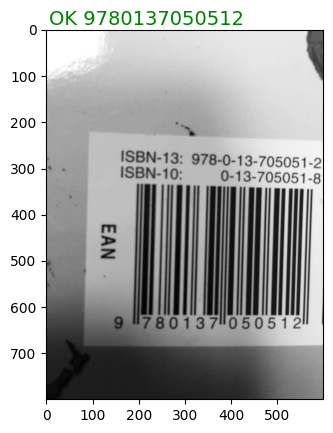

 11%|█         | 1/9 [00:02<00:17,  2.13s/it]

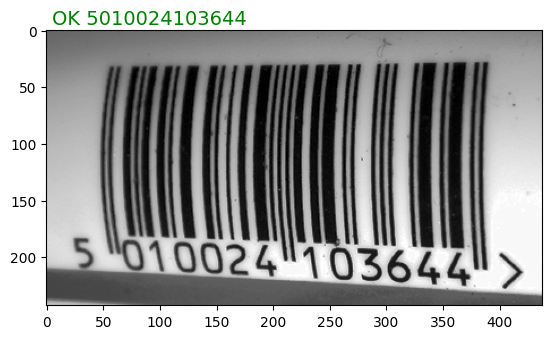

 22%|██▏       | 2/9 [00:03<00:11,  1.61s/it]

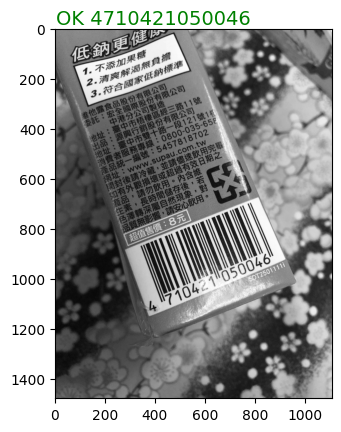

 33%|███▎      | 3/9 [00:04<00:08,  1.36s/it]

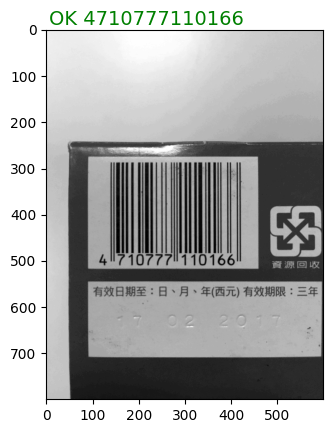

 56%|█████▌    | 5/9 [00:04<00:02,  1.36it/s]

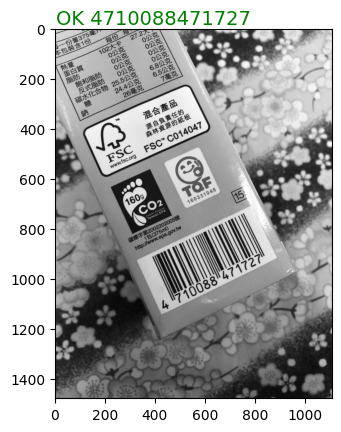

 67%|██████▋   | 6/9 [00:06<00:02,  1.04it/s]

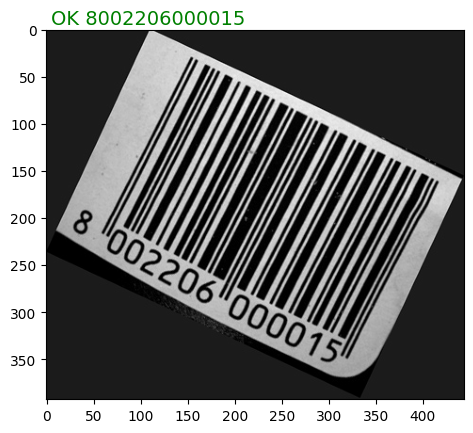

 78%|███████▊  | 7/9 [00:06<00:01,  1.20it/s]

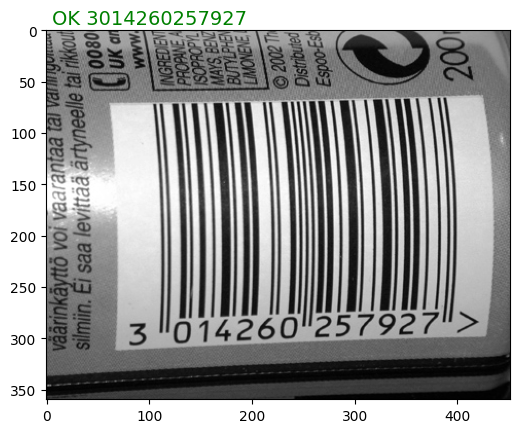

 89%|████████▉ | 8/9 [00:07<00:00,  1.47it/s]

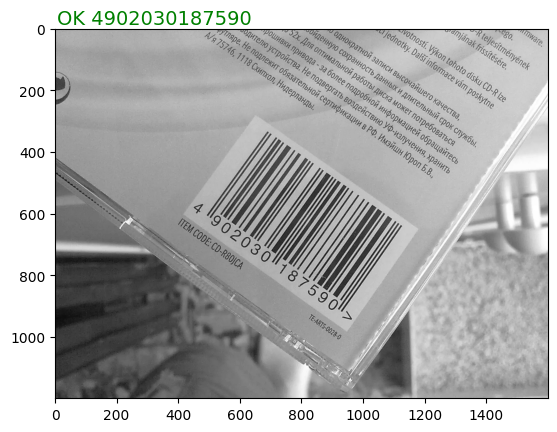

100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

accuracy: 1.0
avg time (sec): 0.1894339621067047

test1.bmp : 9780137050512
barcode03.jpg : 5010024103644
S__29483012.jpg : 4710421050046
test2.bmp : 4710777110166
S__29483010.jpg : 4710088471727
barcode13.jpg : 8002206000015
barcode17.jpg : 3014260257927
test8.jpg : 4902030187590


In [5]:
line_num = 'auto'
# 0<=angle<=180
angles = [ 90, 75, 105, 60, 120, 45, 135, 30, 150, 15, 165, 0, 180]
# angles = [90]
torelances = [2, 3, 4, 5, 1]
# torelances = [1]


acc,duration,all_codes,all_imgs = \
    solver('./barcodes', 
           line_num=line_num, 
           angles=angles, 
           torelances=torelances, 
           show_res=True, show_drop=False)

print('accuracy:', acc)
print('avg time (sec):', duration, end='\n\n')
for i in range(len(all_codes)):
    print(all_imgs[i],':', all_codes[i])